In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [3]:

df = pd.read_csv("/content/car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
df.drop(['Car_Name'], axis=1, inplace=True)


In [15]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Owner_1,Owner_3
0,2014,3.35,5.59,27000,False,True,False,True,False,False
1,2013,4.75,9.54,43000,True,False,False,True,False,False
2,2017,7.25,9.85,6900,False,True,False,True,False,False
3,2011,2.85,4.15,5200,False,True,False,True,False,False
4,2014,4.60,6.87,42450,True,False,False,True,False,False


In [17]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [21]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [22]:
print("Linear Regression R2:", round(r2_score(y_test, y_pred_lr), 3))
print("Random Forest R2:", round(r2_score(y_test, y_pred_rf), 3))
print("Random Forest MSE:", round(mean_squared_error(y_test, y_pred_rf), 2))


Linear Regression R2: 0.85
Random Forest R2: 0.964
Random Forest MSE: 0.83


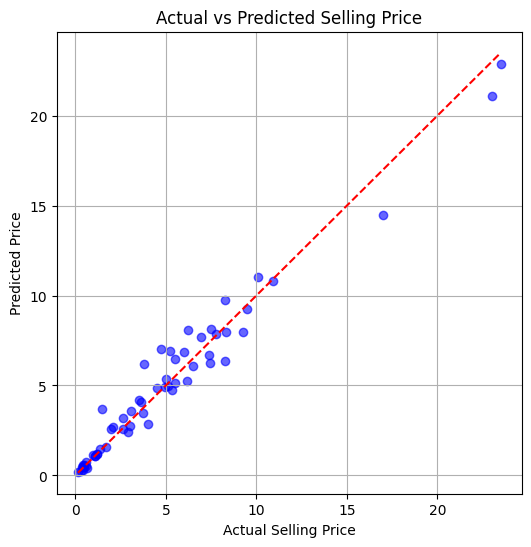

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()
